In [1]:
from random import uniform, randint
from fractions import Fraction
import numpy as np
from scipy.optimize import leastsq
from sympy import symbols, expand, lambdify
import numpy as np
import random
import math
from scipy.optimize import leastsq, curve_fit
from sklearn.metrics import mean_squared_error

def is_number(str):
    try:
        float(str)
        return True
    except ValueError:
        try:
            complex(str)
            return True
        except ValueError:
            return False
    except TypeError:
        try:
            complex(str)
            return True
        except TypeError:
            return False


# .is_number ( str = string )
# return: TRUE если str может быть преобразован к типу complex или float

def type_conversion(str):  # преобразование типов
    try:
        float(str)
        return float(str)
    except ValueError:
        complex(str)
        return complex(str)


# .type_conversion(str = string)
# Возвращает float(str), при ошибке типа ValueError complex(str)

def matrixTranspose(anArray):
    transposed = [None] * len(anArray[0])
    for t in range(len(anArray)):
        transposed[t] = [None] * len(anArray)
        for tt in range(len(anArray[t])):
            transposed[t][tt] = anArray[tt][t]
    return transposed


def matrix(random=0, float_random=0, a=1, b=100):
    m = input('Введите количество строк: ')

    while m.isdigit() != 1:
        print("Неверный формат ввода")
        m = input('Введите количество строк: ')
    n = input('Введите количество столбцов: ')

    while n.isdigit() != 1:
        print("Неверный формат ввода")
        n = input('Введите количество столбцов: ')
    m = int(m)
    n = int(n)
    matr = []
    if random == 0:
        for i in range(m):
            t = []
            for j in range(n):
                _ = input(f'Введите элемент {i + 1} строки {j + 1} столбца: ')
                while is_number(_) != 1:
                    print("Неверный формат ввода")
                    _ = input(f'Введите элемент {i + 1} строки {j + 1} столбца: ')
                try:
                    t.append(float(_))
                except ValueError:
                    try:
                        t.append(complex(_))
                    except ValueError:
                        None
            matr.append(t)
    else:
        for i in range(m):
            t = []
            for j in range(n):
                if float_random == 1:
                    _ = uniform(a, b)
                    t.append(_)
                else:
                    _ = randint(a, b)
                    t.append(_)
            matr.append(t)

    return matr


# .matrix ( m = int, n = int)
# Возвращает матрицу m x n
# Ввод элементов с клавиатуры
def det2(matrix):
    return matrix[0][0] * matrix[1][1] - matrix[1][0] * matrix[0][1]


def alg_dop(matrix, somme=None, prod=1):
    if (somme == None):
        somme = []
    if (len(matrix) == 1):
        somme.append(matrix[0][0])
    elif (len(matrix) == 2):
        somme.append(det2(matrix) * prod)
    else:
        for index, elmt in enumerate(matrix[0]):
            transposee = [list(a) for a in zip(*matrix[1:])]
            del transposee[index]
            mineur = [list(a) for a in zip(*transposee)]
            somme = alg_dop(mineur, somme, prod * matrix[0][index] * (-1) ** (index + 2))
    return somme


def determinant(matrix):
    return sum(alg_dop(matrix))


# .determinant(matr = matrix)
# Возвращает определитель matrix


def sum_matrix(mtrx_1, mtrx_2):
    tmp_mtrx = [[0 for j in range(len(mtrx_1))] for i in range(len(mtrx_1[0]))]
    for i in range(len(mtrx_1)):
        for j in range(len(mtrx_1[0])):
            t = type_conversion(mtrx_1[i][j])
            m = type_conversion(mtrx_2[i][j])
            tmp_mtrx[i][j] = t + m
    return tmp_mtrx


def minor(matrix, i, j):
    minor = []
    for q in (matrix[:i] + matrix[i + 1:]):
        _ = q[:j] + q[j + 1:]
        minor.append(_)
    return minor


def subtraction_matrix(mtrx_1, mtrx_2):
    tmp_mtrx = [[0 for j in range(len(mtrx_1))] for i in range(len(mtrx_1[0]))]
    for i in range(len(mtrx_1)):
        for j in range(len(mtrx_1[0])):
            t = type_conversion(mtrx_1[i][j])
            m = type_conversion(mtrx_2[i][j])
            tmp_mtrx[i][j] = t - m
    return tmp_mtrx


def mult_by_count_matrix(mtrx_1, k):
    tmp_mtrx = [[0 for j in range(len(mtrx_1))] for i in range(len(mtrx_1[0]))]
    for i in range(len(mtrx_1)):
        for j in range(len(mtrx_1[0])):
            k = type_conversion(k)
            t = type_conversion(mtrx_1[i][j])
            tmp_mtrx[i][j] = t * k
    return tmp_mtrx


def multiply_matrix(mtrx_1, mtrx_2):
    s = 0
    t = []
    m3 = []
    r1 = len(mtrx_1)
    for z in range(0, r1):
        for j in range(0, r1):
            for i in range(0, r1):
                l1 = type_conversion(mtrx_1[z][i])
                l2 = type_conversion(mtrx_2[i][j])
                s = s + l1 * l2
            t.append(s)
            s = 0
        m3.append(t)
        t = []
    return m3
    return tmp_mtrx


def single_variable(row,
                    index):  # выражение элемента в виде xi = (- a1x1 - a2x2 ... - a(i-1)x(i-1) - a(i+1)x(i+1) ... + с )/ai
    return ([(-i / row[index]) for i in (row[:index] + row[index + 1:-1])] + [row[-1] / row[index]])


def norma(matrix):
    norma_matrix = []
    for i in range(len(matrix)):
        summa = 0
        for j in range(len(matrix)):
            summa += abs(matrix[i][j])
        norma_matrix.append(summa)
    return max(norma_matrix)


def reverse_matrix(matrix):
    deter = determinant(matrix)
    try:
        a = 1 / deter
    except ZeroDivisionError:
        return 'Нулевой определитель'
    matr_dop = [[0] * len(matrix) for i in range(len(matrix))]
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            matr_dop[i][j] = (-1) ** (i + j) * determinant(minor(matrix, i, j))
    matr_dop_T = matrixTranspose(matr_dop)
    return mult_by_count_matrix(matr_dop_T, a)


def cord(matrix):
    return (norma(matrix) * norma(reverse_matrix(matrix)))


def method_Jacobi(a, b):
    eps = float(input('Введите погрешность для метода Якоби: '))
    matrix = []
    for j in range(len(b)):
        matrix.append(a[j] + b[j])
    interm = [0] * (len(matrix)) + [1]
    variables = [0] * len(matrix)
    k = -1
    interm_2 = [0] * (len(matrix)) + [1]
    count = 0
    while k != 0:
        k = 0
        for i in range(len(matrix)):
            variables[i] = single_variable(matrix[i], i)
            for j in range(len(matrix)):
                ne_know = (interm[:i] + interm[i + 1:])
                interm_2[i] += variables[i][j] * ne_know[j]
            if abs(interm[i] - interm_2[i]) > eps:
                k += 1
        interm = interm_2
        interm_2 = [0] * (len(matrix)) + [1]
        # print(interm[:-1])
        # print(k)
        # print('____')
        count += 1
        if count == 1000:
            return (['Метод Якоби не сработал'] * 3)
    return (a, reverse_matrix(a), interm[:-1])


def pick_nonzero_row(m, k):
    while k < m.shape[0] and not m[k, k]:
        k += 1
    return k


def gssjrdn(a, b):
    nc = []
    for i in range(len(a)):
        nc.append(a[i])
    a = np.array(a, float)
    b = np.array(b, float)
    n = len(b)
    st = a

    m = np.hstack((st,
                   np.matrix(np.diag([1.0 for i in range(st.shape[0])]))))
    for k in range(n):
        swap_row = pick_nonzero_row(m, k)
        if swap_row != k:
            m[k, :], m[swap_row, :] = m[swap_row, :], np.copy(m[k, :])
        if m[k, k] != 1:
            m[k, :] *= 1 / m[k, k]
        for row in range(k + 1, n):
            m[row, :] -= m[k, :] * m[row, k]
    for k in range(n - 1, 0, -1):
        for row in range(k - 1, -1, -1):
            if m[row, k]:
                m[row, :] -= m[k, :] * m[row, k]

    for k in range(n):
        if np.fabs(a[k, k]) < 1.0e-12:
            for i in range(k + 1, n):
                if np.fabs(a[i, k]) > np.fabs(a[k, k]):
                    for j in range(k, n):
                        a[k, j], a[i, j] = a[i, j], a[k, j]
                    b[k], b[i] = b[i], b[k]
                    break
        pivot = a[k, k]
        for j in range(k, n):
            a[k, j] /= pivot
        b[k] /= pivot
        for i in range(n):
            if i == k or a[i, k] == 0:
                continue
            factor = a[i, k]
            for j in range(k, n):
                a[i, j] -= factor * a[k, j]
            b[i] -= factor * b[k]

    return nc, np.hsplit(m, n // 2)[0], b


def frkgssjrdn(a, b):
    nc = []
    for i in range(len(a)):
        nc.append(a[i])
    a = np.array(a, float)
    b = np.array(b, float)
    n = len(b)

    for i in range(n):
        for j in range(n):
            a[i, j] = Fraction(a[i, j])
            b[i] = Fraction(*b[i])

    matrix = []
    for j in range(n):
        matrix.append(a[j] + b[j])
    matrix = np.array(matrix, float)
    matrix[i, j] = Fraction(matrix[i, j])

    for k in range(n):
        if np.fabs(a[k, k]) < 1.0e-12:
            for i in range(k + 1, n):
                if np.fabs(a[i, k]) > np.fabs(a[k, k]):
                    for j in range(k, n):
                        a[k, j], a[i, j] = a[i, j], a[k, j]
                    b[k], b[i] = b[i], b[k]
                    break
        pivot = a[k, k]
        for j in range(k, n):
            a[k, j] /= pivot
        b[k] /= pivot
        for i in range(n):
            if i == k or a[i, k] == 0:
                continue
            factor = a[i, k]
            for j in range(k, n):
                a[i, j] -= factor * a[k, j]
            b[i] -= factor * b[k]

    m = np.hstack((matrix,
                   np.matrix(np.diag([1.0 for i in range(matrix.shape[0])]))))
    for k in range(n):
        swap_row = pick_nonzero_row(m, k)
        if swap_row != k:
            m[k, :], m[swap_row, :] = m[swap_row, :], np.copy(m[k, :])
        if m[k, k] != 1:
            m[k, :] *= 1 / m[k, k]
        for row in range(k + 1, n):
            m[row, :] -= m[k, :] * m[row, k]
    for k in range(n - 1, 0, -1):
        for row in range(k - 1, -1, -1):
            if m[row, k]:
                m[row, :] -= m[k, :] * m[row, k]
    return nc, np.hsplit(m, n // 2)[0], b


def method_lin(x, y):
    x_1 = 0
    x_2 = 0
    x_3 = 0
    x_4 = 0
    x2_y = 0
    x_y = 0
    y_1 = 0
    for i in range(len(x)):
        x_1 += x[i]
        x_2 += x[i] ** 2
        x_3 += x[i] ** 3
        x_4 += x[i] ** 4
        x2_y += y[i] * x[i] ** 2
        x_y += y[i] * x[i]
        y_1 += y[i]
    n = len(x)
    a = [[x_2, x_3, x_4], [x_1, x_2, x_3], [n, x_1, x_2]]
    b = [[x2_y], [x_y], [y_1]]
    roots = gssjrdn(a, b)[2]
    c = []
    for i in range(2):
        c.append(*roots[i])

    def f_x(t):
        return c[1] * t + c[0]

    gamma = 0
    f = []
    for i in range(len(x)):
        f.append(f_x(x[i]))
        gamma += (y[i] - f[i]) ** 2
    exp = ''
    for i in [1, 0]:
        if c[i] != 0:
            exp += f'{c[i]}*t**{i} + '
    exp = exp[:-2]
    output = [[x[i]] + [y[i]] + [f[i]] for i in range(len(x))]
    return (output, exp, gamma)


def method_min_square(x, y):
    x_1 = 0
    x_2 = 0
    x_3 = 0
    x_4 = 0
    x2_y = 0
    x_y = 0
    y_1 = 0
    for i in range(len(x)):
        x_1 += x[i]
        x_2 += x[i] ** 2
        x_3 += x[i] ** 3
        x_4 += x[i] ** 4
        x2_y += y[i] * x[i] ** 2
        x_y += y[i] * x[i]
        y_1 += y[i]
    n = len(x)
    a = [
        [x_2, x_3, x_4],
        [x_1, x_2, x_3],
        [n, x_1, x_2]
    ]
    b = [
        [x2_y],
        [x_y],
        [y_1]
    ]
    roots = gssjrdn(a, b)[2]
    c = []
    for i in range(3):
        c.append(*roots[i])

    def f_x(t):
        return c[2] * t ** 2 + c[1] * t + c[0]

    gamma = 0
    f = []
    for i in range(len(x)):
        f.append(f_x(x[i]))
        gamma += (y[i] - f[i]) ** 2
    exp = ''
    for i in [2, 1, 0]:
        if c[i] != 0:
            exp += f'{c[i]}*t**{i} + '
    exp = exp[:-2]
    output = [[x[i]] + [y[i]] + [f[i]] for i in range(len(x))]
    return (output, exp, gamma)


def lagranz(x, y):
    t = symbols('t')
    z = 0
    for j in range(len(y)):
        numerator = 1;
        denominator = 1;
        for i in range(len(x)):
            if i == j:
                numerator = numerator * 1;
                denominator = denominator * 1
            else:
                numerator = expand(numerator * (t - x[i]))
                denominator = denominator * (x[j] - x[i])
        z = expand(z + y[j] * numerator / denominator)
    f_x = lambdify(t, z)
    output = []
    for k in range(len(x)):
        output.append([x[k], y[k], f_x(x[k])])
    return (output, z)


# Вывод в формате ([[x1,y1,f_x1]...[xi,yi,f_xi]], f_x)
# f_x - строка, можно преобразовать в функцию типа f_x(x0) = y0

class SplineTuple:
    def __init__(self, a, b, c, d, x):
        self.a = a
        self.b = b
        self.c = c
        self.d = d
        self.x = x


# Построение сплайна
# x - узлы сетки, должны быть упорядочены по возрастанию, кратные узлы запрещены
# y - значения функции в узлах сетки
# n - количество узлов сетки
def BuildSpline(x, y):
    # Инициализация массива сплайнов
    n = len(x)
    splines = [SplineTuple(0, 0, 0, 0, 0) for _ in range(0, n)]
    for i in range(0, n):
        splines[i].x = x[i]
        splines[i].a = y[i]

    splines[0].c = splines[n - 1].c = 0.0

    # Решение СЛАУ относительно коэффициентов сплайнов c[i] методом прогонки для трехдиагональных матриц
    # Вычисление прогоночных коэффициентов - прямой ход метода прогонки
    alpha = [0.0 for _ in range(0, n - 1)]
    beta = [0.0 for _ in range(0, n - 1)]

    for i in range(1, n - 1):
        hi = x[i] - x[i - 1]
        hi1 = x[i + 1] - x[i]
        A = hi
        C = 2.0 * (hi + hi1)
        B = hi1
        F = 6.0 * ((y[i + 1] - y[i]) / hi1 - (y[i] - y[i - 1]) / hi)
        z = (A * alpha[i - 1] + C)
        alpha[i] = -B / z
        beta[i] = (F - A * beta[i - 1]) / z

    # Нахождение решения - обратный ход метода прогонки
    for i in range(n - 2, 0, -1):
        splines[i].c = alpha[i] * splines[i + 1].c + beta[i]

    # По известным коэффициентам c[i] находим значения b[i] и d[i]
    for i in range(n - 1, 0, -1):
        hi = x[i] - x[i - 1]
        splines[i].d = (splines[i].c - splines[i - 1].c) / hi
        splines[i].b = hi * (2.0 * splines[i].c + splines[i - 1].c) / 6.0 + (y[i] - y[i - 1]) / hi
    return splines


# Вычисление значения интерполированной функции в произвольной точке
def Interpolate(splines, x):
    if not splines:
        return None  # Если сплайны ещё не построены - возвращаем NaN

    n = len(splines)
    s = SplineTuple(0, 0, 0, 0, 0)

    if x <= splines[0].x:  # Если x меньше точки сетки x[0] - пользуемся первым эл-тов массива
        s = splines[0]
    elif x >= splines[n - 1].x:  # Если x больше точки сетки x[n - 1] - пользуемся последним эл-том массива
        s = splines[n - 1]
    else:  # Иначе x лежит между граничными точками сетки - производим бинарный поиск нужного эл-та массива
        i = 0
        j = n - 1
        while i + 1 < j:
            k = i + (j - i) // 2
            if x <= splines[k].x:
                j = k
            else:
                i = k
        s = splines[j]

    dx = x - s.x
    return s.a + (s.b + (s.c / 2.0 + s.d * dx / 6.0) * dx) * dx;

accuracy = 0.00001
START_X = -1
END_X = 6
START_Y = -1
END_Y = 20
temp = []

def whence_differences(y_array):
    return_array = []
    for i in range(0, len(y_array) - 1):
        return_array.append(y_array[i + 1] - y_array[i])
    return return_array

def witchcraft_start(y_array, h):
    part_y = [y_array[0]]
    y = y_array
    for i in range(0, len(y_array) - 1):
        y = whence_differences(y)
        part_y.append(y[0] / math.factorial(i + 1) / (h ** (i + 1)))
    return part_y

def tragic_magic(coefficients_y, point, x_array):
    value = coefficients_y[0]
    for i in range(1, len(coefficients_y)):
        q = 1
        for j in range(0, i):
            q *= (point - x_array[j])
        value += coefficients_y[i] * q
    return value

def build_points(x_array, y_array):
    for i in range(0, len(x_array)):
        plt.scatter(x_array[i], y_array[i])

def newton_there(x_array, y_array):
    x0 = x_array[0]
    h = x_array[1] - x_array[0]
    build_points(x_array, y_array)
    part_y = witchcraft_start(y_array, h)
    x = np.linspace(x_array[0], x_array[len(x_array) - 1], 228)
    return (x, tragic_magic(part_y, x, x_array), part_y)

def witchcraft_continue(y_array, h):
    part_y = [y_array[len(y_array) - 1]]
    y = y_array
    for i in range(0, len(y_array) - 1):
        y = whence_differences(y)
        part_y.append(y[len(y) - 1] / math.factorial(i + 1) / (h ** (i + 1)))
    return part_y

def ecstatic_magic(coefficients_y, point, x_array):
    value = coefficients_y[0]
    for i in range(1, len(coefficients_y)):
        q = 1
        for j in range(0, i):
            q *= (point - x_array[len(x_array) - j - 1])
        value += coefficients_y[i] * q
    return value

def newton_here_the_boss(x_array, y_array):
    x0 = x_array[0]
    h = x_array[1] - x_array[0]
    build_points(x_array, y_array)
    part_y = witchcraft_continue(y_array, h)
    x = np.linspace(x_array[0], x_array[len(x_array) - 1], 228)
    return (x, ecstatic_magic(part_y, x, x_array), part_y)

def approximate_log_function(x, y):

    C = np.arange(0.01, 1, step = 0.01)
    a = np.arange(0.01, 1, step = 0.01)
    b = np.arange(0.01, 1, step = 0.01)

    min_mse = 9999999999
    parameters = [0, 0, 0]

    for i in np.array(np.meshgrid(C, a, b)).T.reshape(-1, 3):
        y_estimation = i[0] * np.log(i[1] * np.array(x) + i[2])
        mse = mean_squared_error(y, y_estimation)
        if mse < min_mse:
            min_mse = mse
            parameters = [i[0], i[1], i[2]]
    output = [[x[i]]+[y[i]]+[y_estimation[i]] for i in range(len(x))]
    return (output, min_mse)
              
def ap_norm_rasp(x,y_real):
    def norm(x, mean, sd):
        norm = []
        for i in range(len(x)):
            norm += [1.0/(sd*np.sqrt(2*np.pi))*np.exp(-(x[i] - mean)**2/(2*sd**2))]
        return np.array(norm)
    mean1, mean2 = 10, -2
    std1, std2 = 0.5, 10 
    m, dm, sd1, sd2 = [3, 10, 1, 1]
    p = [m, dm, sd1, sd2] # Initial guesses for leastsq
    y_init = norm(x, m, sd1) + norm(x, m + dm, sd2) # For final comparison plot
    def res(p, y, x):
        m, dm, sd1, sd2 = p
        m1 = m
        m2 = m1 + dm
        y_fit = norm(x, m1, sd1) + norm(x, m2, sd2)
        err = y - y_fit
        return err
    plsq = leastsq(res, p, args = (y_real, x))
    y_est = norm(x, plsq[0][0], plsq[0][2]) + norm(x, plsq[0][0] + plsq[0][1], plsq[0][3])
    gamma = 0
    for i in range(len(x)):
        gamma += (y_real[i]-y_init[i])**2
        output = [[x[i]]+[y_real[i]]+[y_init[i]] for i in range(len(x))]
    return (output, gamma)

def approximate_exp_function(x,y):
    x_1 = 0
    x_2 = 0
    x_3 = 0
    x_4 = 0
    x2_y = 0
    x_y = 0
    y_1 = 0
    for i in range(len(x)):
        x_1 += x[i]
        x_2 += x[i]**2
        x_3 += x[i]**3
        x_4 += x[i]**4
        x2_y += y[i]*x[i]**2
        x_y += y[i]*x[i]
        y_1 += y[i]
    n = len(x)
    a = [[x_2,x_3,x_4],[x_1,x_2,x_3],[n,x_1,x_2]]
    b = [[x2_y],[x_y],[y_1]]
    roots = gssjrdn(a,b)[2]
    c = []
    for i in range(3):
        c.append(*roots[i])
    def f_x(t):
        return c[0]*math.e**(c[1]*t)
    gamma = 0
    f = []
    for i in range(len(x)):
        f.append(f_x(x[i]))
        gamma += (y[i]-f[i])**2
    exp = ''
    for i in [1,0]:
        if c[i] != 0:
            exp += f'{c[i]}*e**({c[i+1]}*t) + '
    exp = exp[:-2]
    output = [[x[i]]+[y[i]]+[f[i]] for i in range(len(x))]
    return (output,exp, gamma)

def interpol_st(xp,fp):
    x = np.linspace(-np.pi, 10, 100)
    y = np.interp(x, xp, fp)
    fig, ax = plt.subplots()
    plt.plot(xp, fp,'b',label="Исходные точки")
    plt.plot(x, y,'r',label=f'Интерполированная функция')
    plt.title('Интерполяция точек стандартной numpy')
    plt.show()
    
def aprox_st(xp,fp):
    x = np.linspace(-len(xp)/2, len(xp)/2, 100)
    y = np.polyfit(xp, fp, 99)
    fig, ax = plt.subplots()
    plt.plot(xp, fp,'b',label="Исходные точки")
    plt.plot(x, y,'r',label=f'Интерполированная функция')
    plt.title('Апроксимация точек стандартной numpy')
    plt.show()

Введите y` [доступные символы t,y,z]: t+y+11*z
Хотите ввести еще одно уравнение? [1/0] 1
Введите z` [доступные символы t,y,z]: sqrt(13*t)+z
Начальное условие, y0 = 0
Начало промежутка: 0
Конец промежутка: 1
Начальное условие, z0 = 0


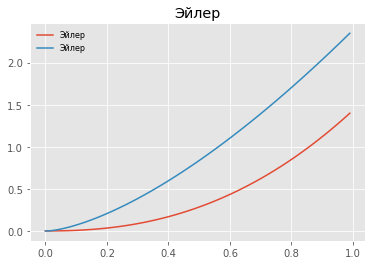

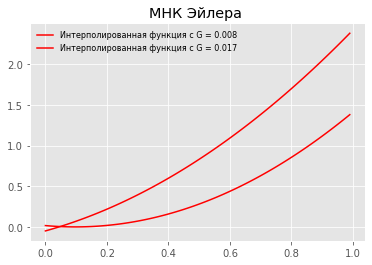

<ipython-input-1-9471172d80ea>:597: RuntimeWarning: divide by zero encountered in double_scalars
  part_y.append(y[len(y) - 1] / math.factorial(i + 1) / (h ** (i + 1)))
<ipython-input-1-9471172d80ea>:606: RuntimeWarning: invalid value encountered in multiply
  value += coefficients_y[i] * q
<ipython-input-1-9471172d80ea>:606: RuntimeWarning: invalid value encountered in add
  value += coefficients_y[i] * q


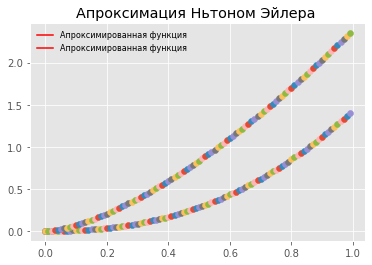

Начальное условие, y0 = 0
Начало промежутка: 0
Конец промежутка: 1
Начальное условие, z0 = 0


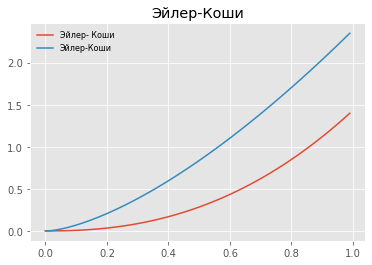

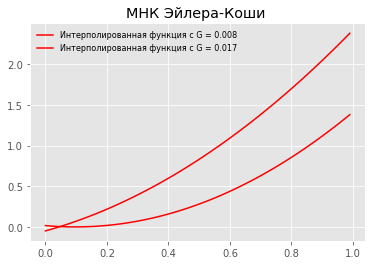

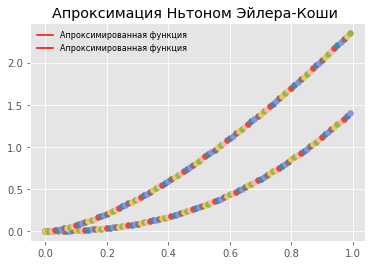

Начальное условие, y0 = 0
Начальное условие, z0 = 0
Начало промежутка: 1
Конец промежутка: 0


<lambdifygenerated-13>:2: RuntimeWarning: invalid value encountered in sqrt
  return (sqrt(13)*sqrt(t) + z)


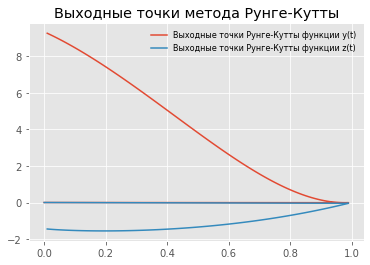

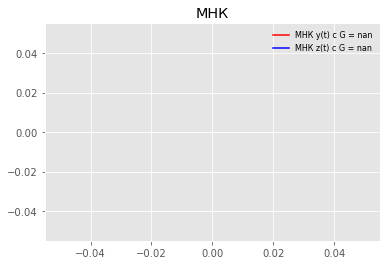

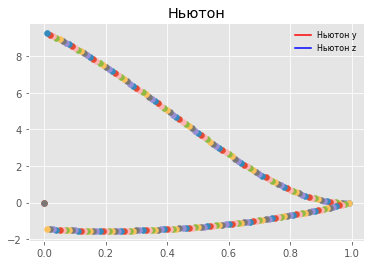

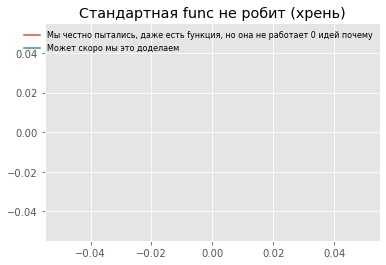

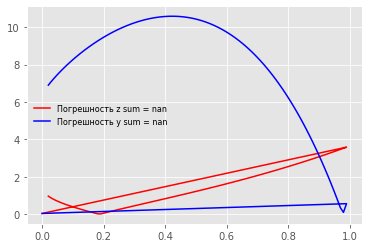

In [20]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy. integrate import odeint
from sympy import symbols, lambdify, sqrt, cos, sin, log, exp

def input_function():
    t = symbols('t')
    y = symbols('y')
    z = symbols('z')
    equation = []

    qwe = eval(input('Введите y` [доступные символы t,y,z]: '))
    equation.append(qwe)
    global answer
    answer = input('Хотите ввести еще одно уравнение? [1/0] ')
    if answer == '1':
        qwe = eval(input('Введите z` [доступные символы t,y,z]: '))
        equation.append(qwe)
    function = []
    for i in range(len(equation)):
        function.append(lambdify([t, y, z], equation[i]))
    return function
    
def euler(func, n=100):
    """Решение ОДУ u'=f(y,x), начальное условие y(0) = U0 , c n шагами, пока  x = b - конец отрезка интегрирования."""
    Y0 = float(input('Начальное условие, y0 = '))
    a = float(input('Начало промежутка: '))
    b = float(input('Конец промежутка: '))
    if answer == '1':
        Z0 = float(input('Начальное условие, z0 = '))
    x = np.zeros(n + 1)
    y = np.zeros(n + 1)
    z = np.zeros(n + 1)
    y[0] = Y0
    if answer == '1':
        z[0] = Z0
    x[0] = a
    output = [[0, Y0]]
    dx = b / float(n)
    if answer == '0':
        for k in range(n):
            x[k + 1] = x[k] + dx
            y[k + 1] = y[k] + dx * func[0](x[k], y[k],0)
            output.append([x[k], y[k]])
        return output
    if answer == '1':
        output = [[0,  Y0, Z0]]
        for k in range(n):
            x[k + 1] = x[k] + dx
            y[k + 1] = y[k] + dx * func[0](x[k], z[k],0)
            z[k + 1] = z[k] + dx * func[1](x[k], z[k],0)
            output.append([x[k], y[k],z[k]])
        return output

def euler_Koshi(func,n=100):
    """Решение ОДУ u'=f(y,x), начальное условие y(0) = U0 , c n шагами, пока  x = b - конец отрезка интегрирования."""
    Y0 = float(input('Начальное условие, y0 = '))
    a = float(input('Начало промежутка: '))
    b = float(input('Конец промежутка: '))
    if answer == '1':
        Z0 = float(input('Начальное условие, z0 = '))
    x = np.zeros(n + 1)
    y = np.zeros(n + 1)
    z = np.zeros(n + 1)
    y[0] = Y0
    if answer == '1':
        z[0] = Z0
    x[0] = a
    output = [[0, Y0]]
    dx = b / n
    if answer == '0':
        for k in range(n):
            x[k + 1] = x[k] + dx
            y[k + 1] = y[k] + dx * func[0](x[k], y[k],0)
            y[k + 1] = y[k] + dx/2*( func[0](x[k], y[k],0)+  func[0](x[k+1], y[k+1],0))
            output.append([x[k], y[k]])
        return output
    if answer == '1':
        output = [[0,  Y0, Z0]]
        for k in range(n):
            x[k + 1] = x[k] + dx
            y[k + 1] = y[k] + dx * func[0](x[k], y[k],z[k])
            y[k + 1] = y[k] + dx/2*( func[0](x[k], y[k],0)+  func[0](x[k+1], y[k+1],0))
            z[k + 1] = z[k] + dx * func[1](x[k],z[k],0)
            z[k + 1] = z[k] + dx/2*( func[1](x[k],z[k],0)+  func[1](x[k+1], z[k+1],0))
            output.append([x[k], y[k],z[k]])
        return output
    
def rungekutta4(function):
    y0 = float(input('Начальное условие, y0 = '))
    if answer == '1':
        z0 = float(input('Начальное условие, z0 = '))
        zn = z0
    a = float(input('Начало промежутка: '))
    b = float(input('Конец промежутка: '))
    n = 100
    h = (b - a) / n
    output = [[0, 0, y0]]
    counter = 0
    yn = y0
    otrezok = []
    for i in range(n):
        a += h
        otrezok.append(round(a, 5))
    if answer == '0':
        for i in otrezok:
            counter += 1
            k1 = function[0](i, yn,1) * h
            k2 = function[0](i + h / 2, yn + k1 / 2, 1) * h
            k3 = function[0](i + h / 2, yn + k2 / 2, 1) * h
            k4 = function[0](i + h, yn + k3, 1) * h
            yn = yn + (1 / 6) * (k1 + 2 * k2 + 3 * k3 + k4)
            output.append([counter, i, yn])
        return output
    elif answer == '1':
        output = [[0, 0, y0, z0]]
        for i in otrezok:
            counter += 1
            k1 = function[0](i, yn, zn) * h
            m1 = function[1](i, yn, zn) * h

            k2 = function[0](i + h / 2, yn + k1 / 2, zn + m1 / 2) * h
            m2 = function[1](i + h / 2, yn + k1 / 2, zn + m1 / 2) * h

            k3 = function[0](i + h / 2, yn + k2 / 2, zn + m2 / 2) * h
            m3 = function[1](i + h / 2, yn + k2 / 2, zn + m2 / 2) * h

            k4 = function[0](i + h, yn + k3, zn + m3) * h
            m4 = function[1](i + h, yn + k3, zn + m3) * h

            yn = yn + (1 / 6) * (k1 + 2 * k2 + 3 * k3 + k4)
            zn = zn + (1 / 6) * (m1 + 2 * m2 + 3 * m3 + m4)
            output.append([counter, i, yn, zn])
        return output
    
def stndrt_func(func,n=100):
    Y0 = float(input('Начальное условие, y0 = '))
    a = float(input('Начало промежутка: '))
    b = float(input('Конец промежутка: '))
    if answer == '1':
        Z0 = float(input('Начальное условие, z0 = '))
    x = np.zeros(n + 1)
    y = np.zeros(n + 1)
    z = np.zeros(n + 1)
    y[0] = Y0
    if answer == '1':
        z[0] = Z0
    x[0] = a
    output = [[0, Y0]]
    dx = b / float(n)
    if answer == '0':
        for k in range(n):
            x[k] = x[k+1]+dx
        y = odeint (func[0], Y0, x)
        y = np.array(y).flatten()
        output.append([x, y,z])
        return output
    if answer == '1':
        output = [[0,  Y0, Z0]]
        for k in range(n):
            x[k + 1] = x[k] + dx
        y = odeint (func[0](x,y,0), Y0, x)
        z = odeint (func[1](x,z,0), Z0, x)   
        output.append([x, y,z])
        return output

def diff_left_side(x,y):
    h = x[1] - x[0]
    dy = []
    for i in range(1,len(x)):
        dy.append((y[i] - y[i-1])/h)
    return dy

plt.style.use('ggplot')    

Input =  input_function()
qwe = euler(Input)
X1= []
Y1 = []
Z1 = []

for i in range(len(qwe)):
    X1.append(qwe[i][0])
    Y1.append(qwe[i][1])
    if answer == '1':
        Z1.append(qwe[i][2])
plt.plot(X1, Y1, label='Эйлер')
if answer == '1':
    plt.plot(X1, Z1, label='Эйлер')
plt.title("Эйлер")
plt.legend(loc='best', prop={'size': 8}, frameon = False)
plt.show()

noname1 = method_min_square(X1,Y1)
if answer == '1':
    noname2 = method_min_square(X1,Z1)
_1 = noname1[0]
if answer == '1':
    _2 = noname2[0]
gamma1 = round(noname1[2],3)
if answer == '1':
    gamma2 = round(noname2[2],3)
x1_square = []
f1_square = []
x2_square = []
f2_square = []
for i in range(len(X1)):
    x1_square.append(_1[i][0])
    f1_square.append(_1[i][2])
    if answer == '1':
        x2_square.append(_2[i][0])
        f2_square.append(_2[i][2])
plt.plot(x1_square, f1_square, 'r', label=f'Интерполированная функция c G = {gamma1}')
if answer == '1':
    plt.plot(x2_square, f2_square, 'r', label=f'Интерполированная функция c G = {gamma2}')
plt.title("МНК Эйлера ")
plt.legend(loc='best', prop={'size': 8}, frameon = False)
plt.show()

noname1 = newton_here_the_boss(X1,Y1)
if answer == '1':
    noname2 = newton_here_the_boss(X1,Z1)
x1_square = []
f1_square = []
x2_square = []
f2_square = []
for i in range(len(noname1[1])):
    x1_square.append(noname1[0][i])
    f1_square.append(noname1[1][i])
    if answer == '1':
        x2_square.append(noname2[0][i])
        f2_square.append(noname2[1][i])
plt.plot(x1_square, f1_square, 'r', label=f'Апроксимированная функция ')
if answer == '1':
    plt.plot(x2_square, f2_square, 'r', label=f'Апроксимированная функция ')
plt.title("Апроксимация Ньтоном Эйлера ")
plt.legend(loc='best', prop={'size': 8}, frameon = False)
plt.show()

qwe2 = euler_Koshi(Input)
X2= []
Y2 = []
Z2 = []

for i in range(len(qwe)):
    X2.append(qwe[i][0])
    Y2.append(qwe[i][1])
    if answer == '1':
        Z2.append(qwe[i][2])
plt.plot(X2, Y2, label='Эйлер- Коши')
if answer == '1':
    plt.plot(X2, Z2, label='Эйлер-Коши')
plt.title("Эйлер-Коши")
plt.legend(loc='best', prop={'size': 8}, frameon = False)
plt.show()

noname1 = method_min_square(X2,Y2)
if answer == '1':
    noname2 = method_min_square(X2,Z2)
_1 = noname1[0]
if answer == '1':
    _2 = noname2[0]
gamma1 = round(noname1[2],3)
if answer == '1':
    gamma2 = round(noname2[2],3)
x1_square = []
f1_square = []
x2_square = []
f2_square = []
for i in range(len(X1)):
    x1_square.append(_1[i][0])
    f1_square.append(_1[i][2])
    if answer == '1':
        x2_square.append(_2[i][0])
        f2_square.append(_2[i][2])
plt.plot(x1_square, f1_square, 'r', label=f'Интерполированная функция c G = {gamma1}')
if answer == '1':
    plt.plot(x2_square, f2_square, 'r', label=f'Интерполированная функция c G = {gamma2}')
plt.title("МНК Эйлера-Коши ")
plt.legend(loc='best', prop={'size': 8}, frameon = False)
plt.show()

noname1 = newton_here_the_boss(X2,Y2)
if answer == '1':
    noname2 = newton_here_the_boss(X2,Z2)
x1_square = []
f1_square = []
x2_square = []
f2_square = []
for i in range(len(noname1[1])):
    x1_square.append(noname1[0][i])
    f1_square.append(noname1[1][i])
    if answer == '1':
        x2_square.append(noname2[0][i])
        f2_square.append(noname2[1][i])
plt.plot(x1_square, f1_square, 'r', label=f'Апроксимированная функция ')
if answer == '1':
    plt.plot(x2_square, f2_square, 'r', label=f'Апроксимированная функция ')
plt.title("Апроксимация Ньтоном Эйлера-Коши ")
plt.legend(loc='best', prop={'size': 8}, frameon = False)
plt.show()

x = []
y = []
z = []

noname = rungekutta4(Input)
for i in range(len(noname)):
    x.append(noname[i][1])
    y.append(noname[i][2])
    if answer == '1':
        z.append(noname[i][3])

plt.plot(x, y, label='Выходные точки Рунге-Кутты функции y(t)')
if answer == '1':
    plt.plot(x, z, label='Выходные точки Рунге-Кутты функции z(t)')
plt.title("Выходные точки метода Рунге-Кутты")
plt.legend(loc='best', prop={'size': 8}, frameon=False)

plt.show()

noname = method_min_square(x, y)
_ = noname[0]
if answer == "1":
    nonamez = method_min_square(x,z)
    _z = nonamez[0]
    gamma_z = round(nonamez[2], 3)
gamma_y = round(noname[2], 3)
x_square = []
y_square = []
z_square = []
for i in range(len(x)):
    x_square.append(_[i][0])
    y_square.append(_[i][2])
    if answer == '1':
        z_square.append(_z[i][2])

plt.plot(x_square, y_square, 'r', label=f'МНК y(t) c G = {gamma_y}')
if answer == '1':
    plt.plot(x_square, z_square, 'b', label=f'МНК z(t) c G = {gamma_z}')
plt.title("МНК")
plt.legend(loc='best', prop={'size': 8}, frameon=False)

plt.show()

noname = newton_here_the_boss(x, y)
if answer == '1':
    nonamez = newton_here_the_boss(x,z)
x1_square = []
f1_square = []
z_square = []
for i in range(len(noname[1])):
    x1_square.append(noname[0][i])
    f1_square.append(noname[1][i])
    if answer == '1':
        z_square.append(nonamez[1][i])
plt.plot(x1_square, f1_square, 'r', label=f'Ньютон y')
if answer == '1':
    plt.plot(x1_square, z_square, 'b', label=f'Ньютон z')
plt.title("Ньютон")
plt.legend(loc='best', prop={'size': 8}, frameon=False)

plt.show()

X5= []
Y5 = []
Z5 = []

plt.plot(X5, Y5, label='Мы честно пытались, даже есть fункция, но она не работает 0 идей почему')
plt.plot(X5, Z5, label='Может скоро мы это доделаем')
plt.title("Стандартная func не робит (хрень)")
plt.legend(loc='best', prop={'size': 8}, frameon = False)
plt.show()

delta = []
dy_left_side_y = diff_left_side(x, y)
if answer != '1':
    for i in range(len(dy_left_side_y)):
        delta.append(abs(dy_left_side_y[i] - Input[0](x[i], y[i], 1)))
    summa_y = sum(delta)
if answer == '1':
    delta_z = []
    dy_left_side_y = diff_left_side(x, z)
    for i in range(len(dy_left_side_y)):
        delta.append(abs(dy_left_side_y[i] - Input[0](x[i], y[i], z[i])))
        delta_z.append(abs(dy_left_side_y[i] - Input[1](x[i], y[i], z[i])))
    summa_y = sum(delta)
    summa_z = sum(delta_z)
    plt.plot(x[:-1], delta_z, 'r', label=f'Погрешность z sum = {summa_z}')
    plt.legend(loc='best', prop={'size': 8}, frameon=False)

plt.plot(x[:-1], delta, 'b', label=f'Погрешность y sum = {summa_y}')
plt.legend(loc='best', prop={'size': 8}, frameon=False)
plt.show()